In [ ]:
!pip install openai

# Google Driveと接続を行います。これを行うことで、Driveにあるデータにアクセスできるようになります。
# 下記セルを実行すると、Googleアカウントのログインを求められますのでログインしてください。
from google.colab import drive
drive.mount('/content/drive')

# 作業フォルダへの移動を行います。
# もしアップロードした場所が異なる場合は作業場所を変更してください。
import os
os.chdir('/content/drive/MyDrive/ai_app_dev/7章') #ここを変更

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 1.5 MB/s eta 0:00:00
Mounted at /content/drive


## 画像生成の基本的な使い方を押さえよう

In [ ]:
import os
import openai
os.environ["OPENAI_API_KEY"] = "＜ご自身のAPIキーを入力＞"
openai.api_key = os.getenv("OPENAI_API_KEY")

In [ ]:
image = openai.Image.create(
  prompt="虹と湖の風景",
  size="256x256",
)
print(image["data"][0]["url"])

https://oaidalleapiprodscus.blob.core.windows.net/private/org-z09Il9Vo3r9HCF7dBv7iOKwc/user-n6YrW8MG9pouIJGBF8nvitR9/img-Qgn7oAS0MZIj3bXFZTcEffeT.png?st=2023-10-15T10%3A11%3A10Z&se=2023-10-15T12%3A11%3A10Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-10-15T03%3A14%3A05Z&ske=2023-10-16T03%3A14%3A05Z&sks=b&skv=2021-08-06&sig=wj31DQWtpCIUHNT2PhF/sJ/kdPqRBsYb2PgfXg5o%2B8w%3D


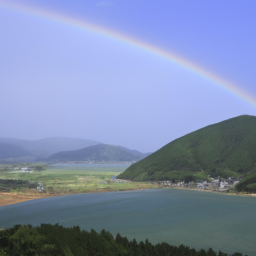

In [ ]:
import base64
from PIL import Image
from io import BytesIO

image = openai.Image.create(
  prompt="虹と湖の風景",
  size="256x256",
  n=1,
  response_format="b64_json"
)

for data in image["data"]:
    img = base64.b64decode(data["b64_json"])
    img = Image.open(BytesIO(img))
    display(img)

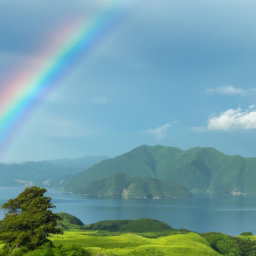

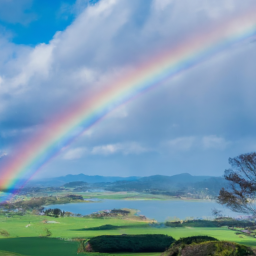

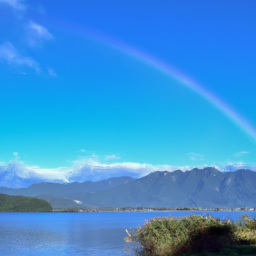

In [ ]:
image = openai.Image.create(
  prompt="虹と湖の風景",
  size="256x256",
  n=3,
  response_format="b64_json"
)

for data in image["data"]:
    img = base64.b64decode(data["b64_json"])
    img = Image.open(BytesIO(img))
    display(img)

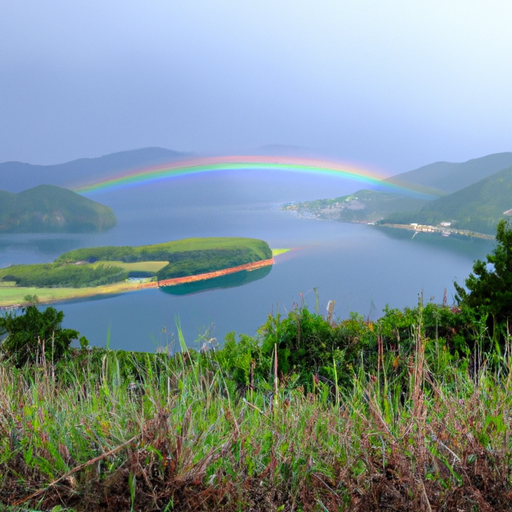

In [ ]:
import base64
from PIL import Image
from io import BytesIO

image = openai.Image.create(
  prompt="虹と湖の風景",
  size="512x512",
  n=1,
  response_format="b64_json"
)

for data in image["data"]:
    img = base64.b64decode(data["b64_json"])
    img = Image.open(BytesIO(img))
    display(img)

## 画像生成のやり方を変えてみよう

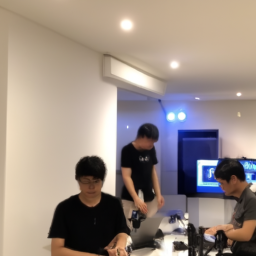

In [ ]:
image = openai.Image.create_variation(
  image=open("data/img01.png", "rb"),
  n=1,
  size="256x256",
  response_format="b64_json"
)

for data in image["data"]:
    img = base64.b64decode(data["b64_json"])
    img = Image.open(BytesIO(img))
    display(img)

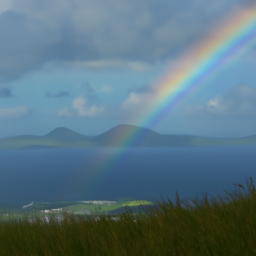

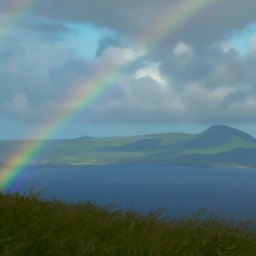

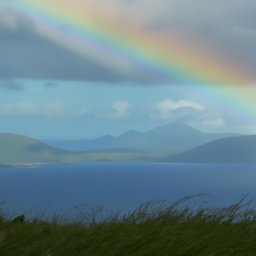

In [ ]:
image = openai.Image.create_variation(
  image=open("data/output_img.png", "rb"),
  n=3,
  size="256x256",
  response_format="b64_json"
)

for data in image["data"]:
    img = base64.b64decode(data["b64_json"])
    img = Image.open(BytesIO(img))
    display(img)

##  言語の入れ方や種類を工夫してみよう

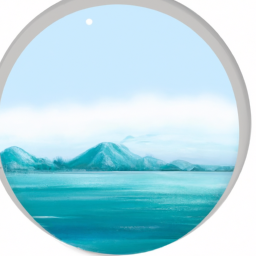

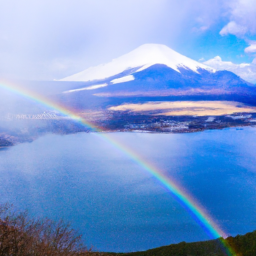

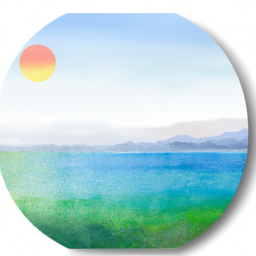

In [ ]:
image = openai.Image.create(
  prompt="高品質な虹と湖の水彩画",
  size="256x256",
  n=3,
  response_format="b64_json"
)

for data in image["data"]:
    img = base64.b64decode(data["b64_json"])
    img = Image.open(BytesIO(img))
    display(img)

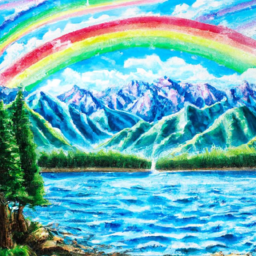

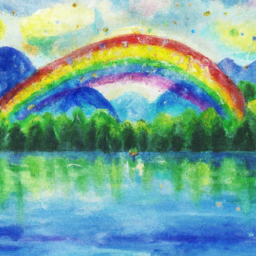

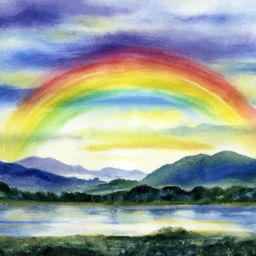

In [ ]:
image = openai.Image.create(
  prompt="High-quality Rainbow and Lake Watercolor Painting",
  size="256x256",
  n=3,
  response_format="b64_json"
)

for data in image["data"]:
    img = base64.b64decode(data["b64_json"])
    img = Image.open(BytesIO(img))
    display(img)

In [ ]:
prompt = '高品質な虹と湖のアニメ風の風景画'
completion = openai.ChatCompletion.create(
  model="gpt-3.5-turbo",
  temperature=0,
  messages=[
    {"role": "system", "content": "あなたはプロの翻訳家です。次の（文章）を英語に翻訳してください。"},
    {"role": "user", "content": f'{prompt}'}
  ]
)
eng_prompt = completion["choices"][0]["message"]["content"]
print(eng_prompt)

A high-quality anime-style landscape painting of a rainbow and a lake.


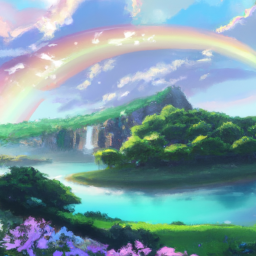

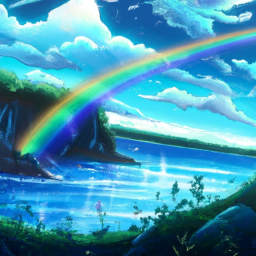

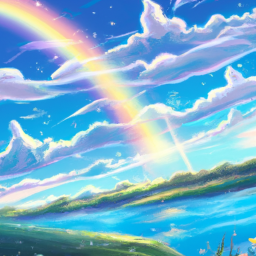

In [ ]:
image = openai.Image.create(
  prompt=eng_prompt,
  size="256x256",
  n=3,
  response_format="b64_json"
)

for data in image["data"]:
    img = base64.b64decode(data["b64_json"])
    img = Image.open(BytesIO(img))
    display(img)